In [1]:
from LIBRERIAS import *

In [2]:
df= pd.read_csv("archivo_csv\BIOMECHANICAL_column_2C_weka.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
df.head(1)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.2544,Abnormal


In [5]:
BIOMECHANICAL= df.replace(["Abnormal", "Normal" ], [1, 0])

In [6]:
BIOMECHANICAL.head(1)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.2544,1


In [17]:
x, y= np.array(BIOMECHANICAL.loc[:,(df.columns !="class")]), np.array(BIOMECHANICAL.loc[:,"class"])

x_train, x_test, y_train, y_test= train_test_split (x, y, test_size= 0.45, random_state= 50)

print(f"Número de Datos que se manejan: x= {len(x)}, y={len(y)}")

print(f"Número de Datos Entrenamiento: x={len(x_train)}, y={len(y_train)}")

print(f"Número de Datos Testeo: x={len(x_test)}, y={len(y_test)}")

Número de Datos que se manejan: x= 310, y=310
Número de Datos Entrenamiento: x=170, y=170
Número de Datos Testeo: x=140, y=140


Clases del Dataset: [0 1]
ROC AUC Score: 0.9160499537465311
Tresholds Data: 
[       inf 1.         0.97892734 0.97839336 0.94053046 0.93920231
 0.90635306 0.90155562 0.84041002 0.83713736 0.83120001 0.82711587
 0.81610192 0.79973486 0.77427104 0.77421735 0.72084302 0.71086615
 0.6682686  0.62236483 0.58799172 0.54697103 0.45402089 0.41037438
 0.38975483 0.3478246  0.34163831 0.27560524 0.25647313 0.20969594
 0.20178966 0.19425227 0.18671189 0.1310754  0.11972315 0.00425684]


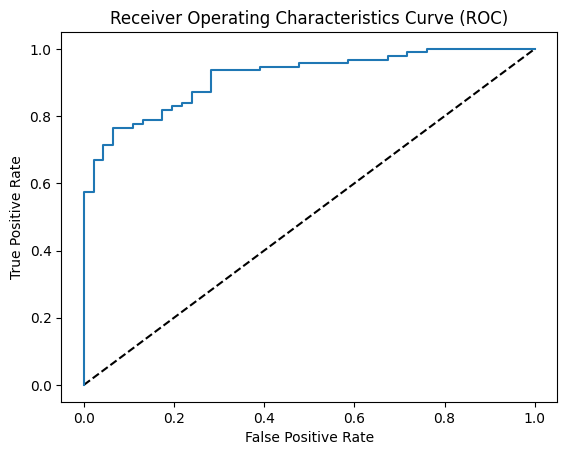

In [18]:
# ROC Curve

reg_rcurve= LogisticRegression(solver= "liblinear", random_state= 0).fit(x_train, y_train)

print(f"Clases del Dataset: {reg_rcurve.classes_}")

y_prediccion_prob= reg_rcurve.predict_proba(x_test)[:, 1]

FPR, TPR,  Thresholds= roc_curve(y_test, y_prediccion_prob)

print(f"ROC AUC Score: {roc_auc_score(y_test, y_prediccion_prob)}")
print(f"Tresholds Data: \n{Thresholds}")

# Visualización

plt.plot([0,1],[0,1],"k--")

plt.plot(FPR,TPR)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("Receiver Operating Characteristics Curve (ROC)")

plt.show()


In [19]:
FPR_TPR= pd.DataFrame({"True Positive Rate": TPR, "False Positive Rate": FPR})
FPR_TPR

,True Positive Rate,False Positive Rate
0,0.000000,0.000000
1,0.010638,0.000000
2,0.574468,0.000000
3,0.574468,0.021739
4,0.670213,0.021739
5,0.670213,0.043478
6,0.712766,0.043478
7,0.712766,0.065217
8,0.765957,0.065217
9,0.765957,0.108696
